In [8]:
from prody import *
import matplotlib.pyplot as plt

In [14]:
pdb = parsePDB("4ji1_f.pdb")
#,chain='D')
#ca = pdb.select("name CA")
pd = pdb.select("name CA or name P")
#writePDB("and.pdb",pd)
anm =GNM('ubi') # instantiate ANM object
anm.buildKirchhoff(pd) # build Hessian matrix for selected atoms
anm.calcModes()
pd1 = pd.select('chain B')

@> 51240 atoms and 1 coordinate set(s) were parsed in 0.28s.
@> Kirchhoff was built in 0.09s.
@> 20 modes were calculated in 2.57s.


In [15]:
writeNMD('aln.nmd',anm,pd1)

Exception: number of atoms do not match

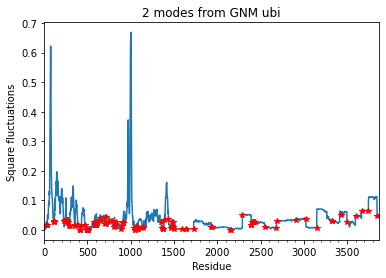

In [13]:
#anm.calcModes
d = calcTempFactors(anm,pd)
a = pd.getBetas()
b = calcSqFlucts(anm)
hinge = calcHinges(anm)
#writePDB('2vqe_sq.pdb',pd,beta=b*100)
######writePDB('2vqeee_bbb.pdb',pdb,betas=a)
#plt.plot(b)
#plt.plot(hinge)
showSqFlucts(anm[0:2], hinges=True);

@> 51240 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> Kirchhoff was built in 12.03s.
@> 20 modes were calculated in 7100.06s.


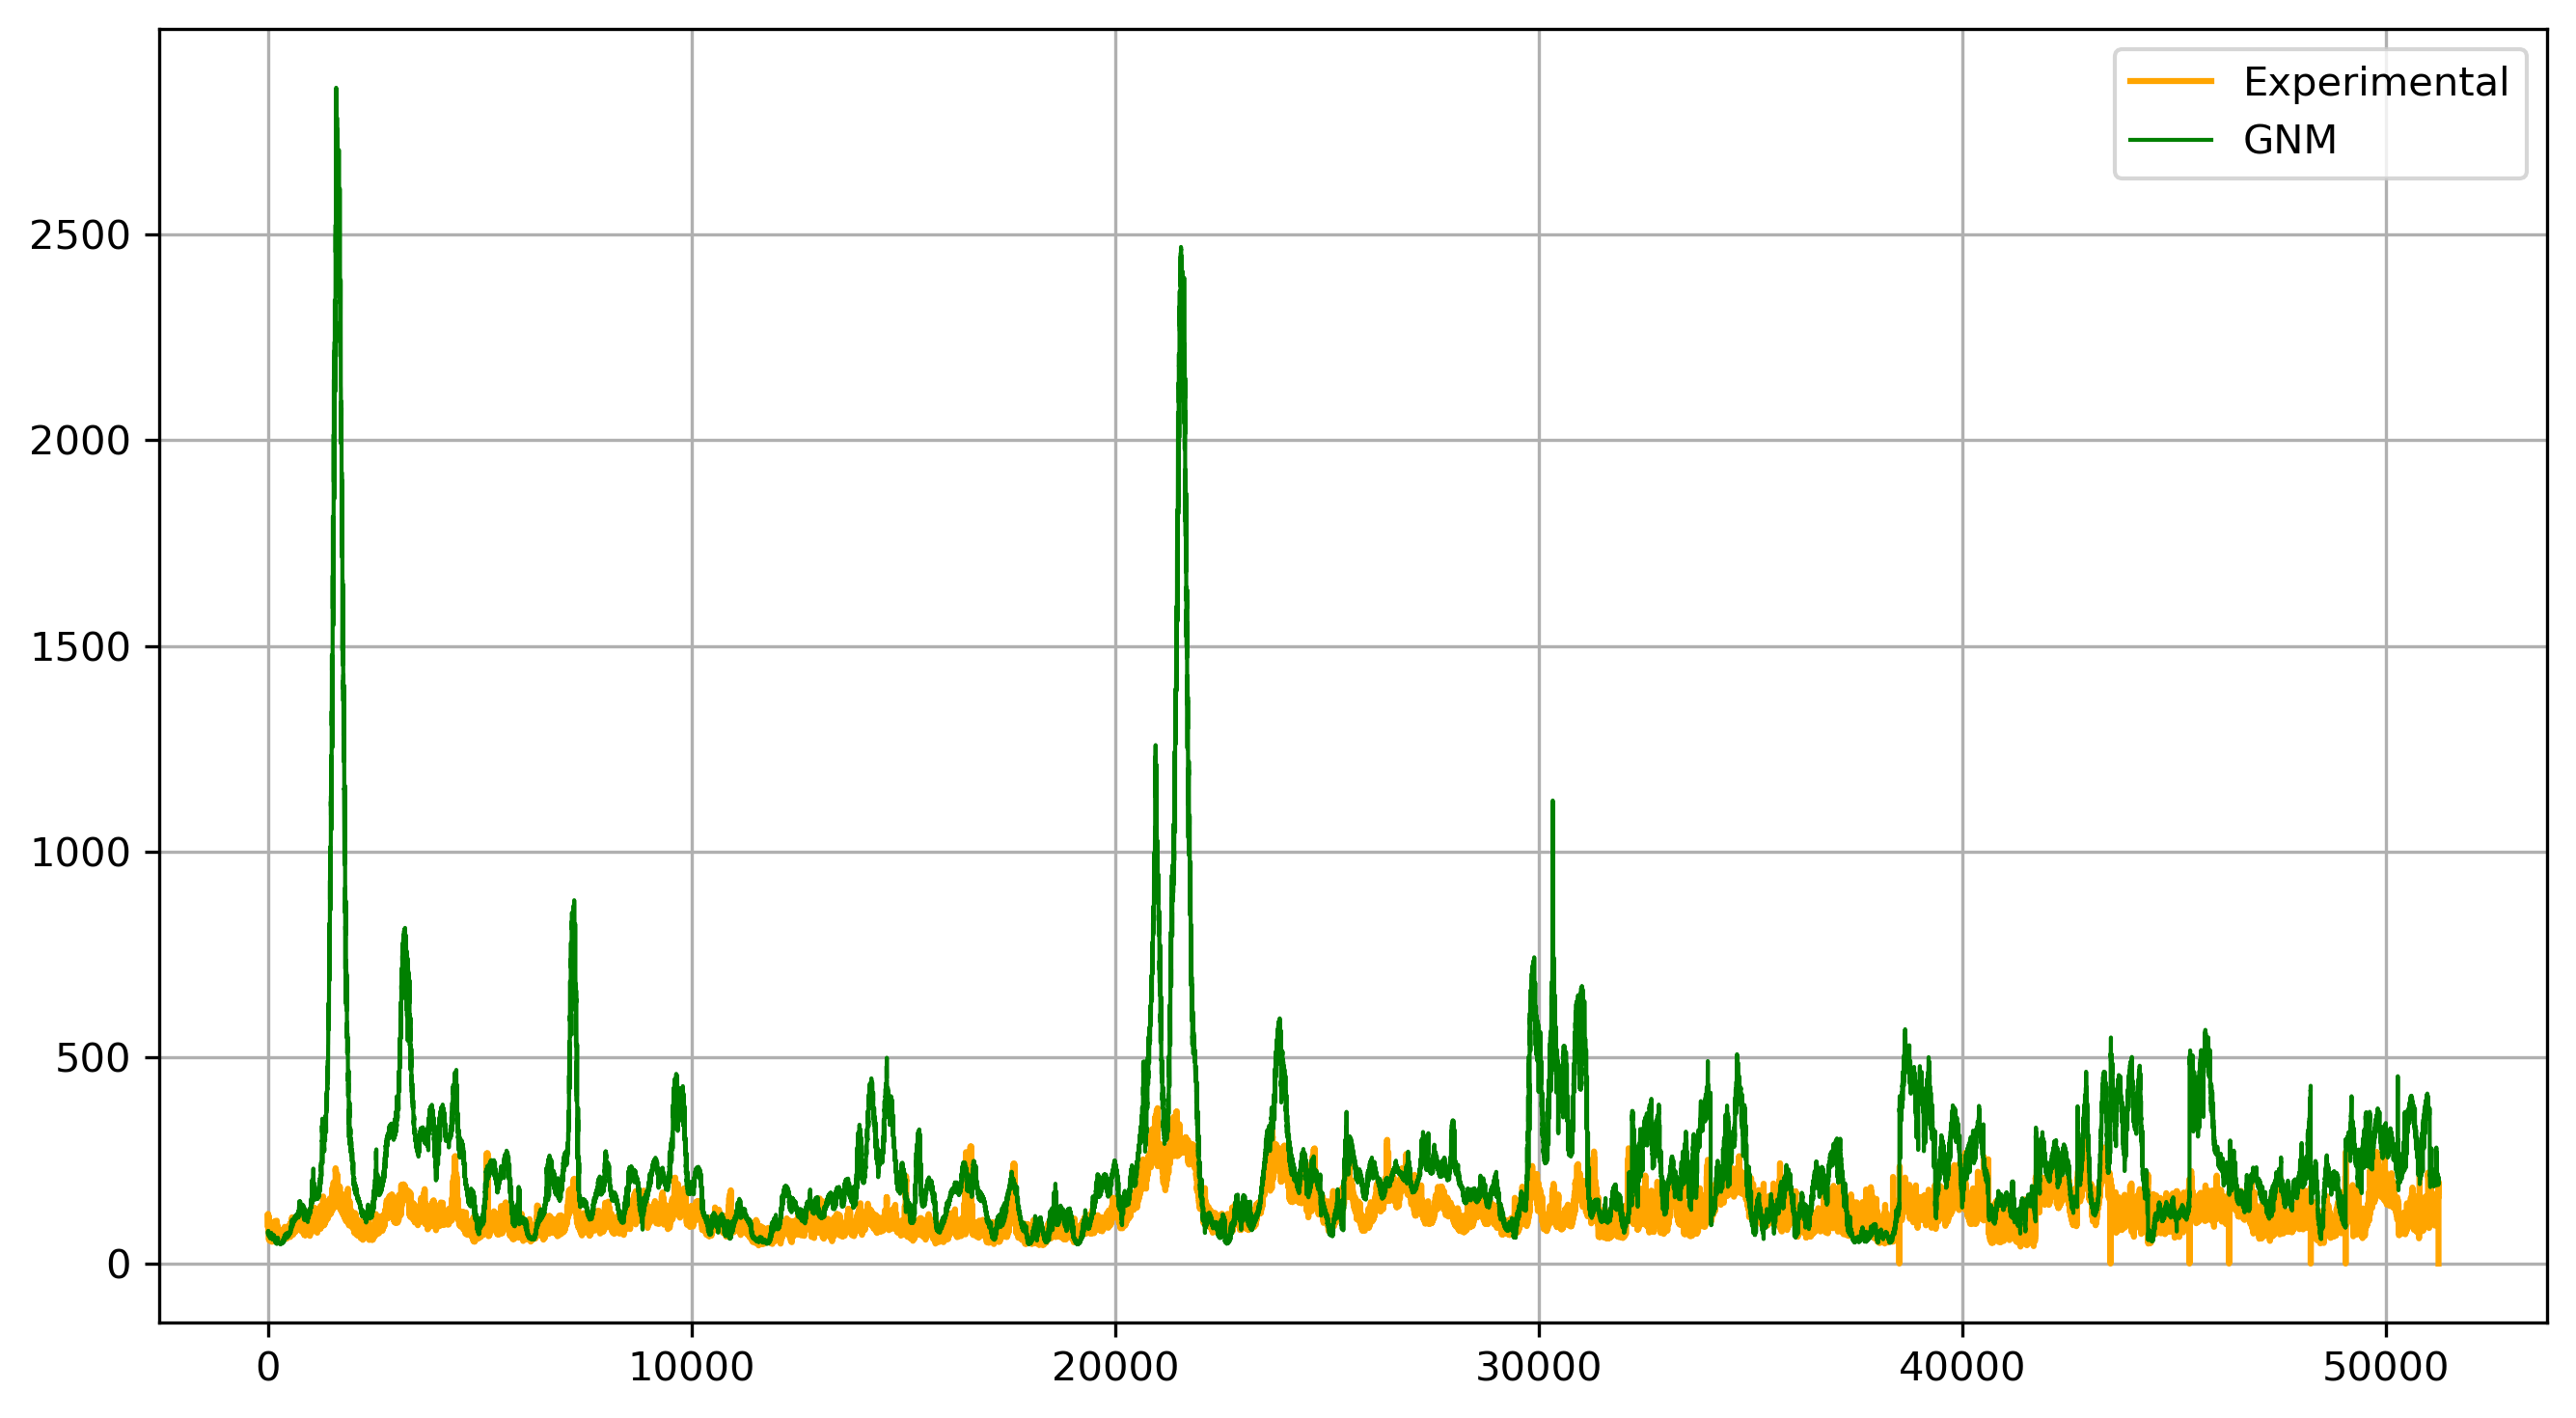

In [35]:
from numpy import *
from matplotlib.pyplot import *
pdb = parsePDB("4ji1_f.pdb")
calphas = pdb
#.select('name CA or name P')
gnm = GNM('AKE')
gnm.buildKirchhoff(calphas)
gnm.calcModes()
#print(calcHinges(gnm[:2]))

bfactors = calphas.getBetas()
b_fac = np.linalg.norm(bfactors)
norm_bfact = bfactors/b_fac
msfs = calcSqFlucts(gnm)
msfs = msfs / mean(msfs) * mean(bfactors)
msf_n = np.linalg.norm(msfs)
norm_msf = msfs/msf_n

figure(figsize=(9, 5), dpi=300)
plot(bfactors, 'orange', label='Experimental')
plot(msfs*2, 'g', lw=1., label='GNM')
#xlim(1741,2145)
#ylim(0,100)
grid()
legend()
tight_layout();

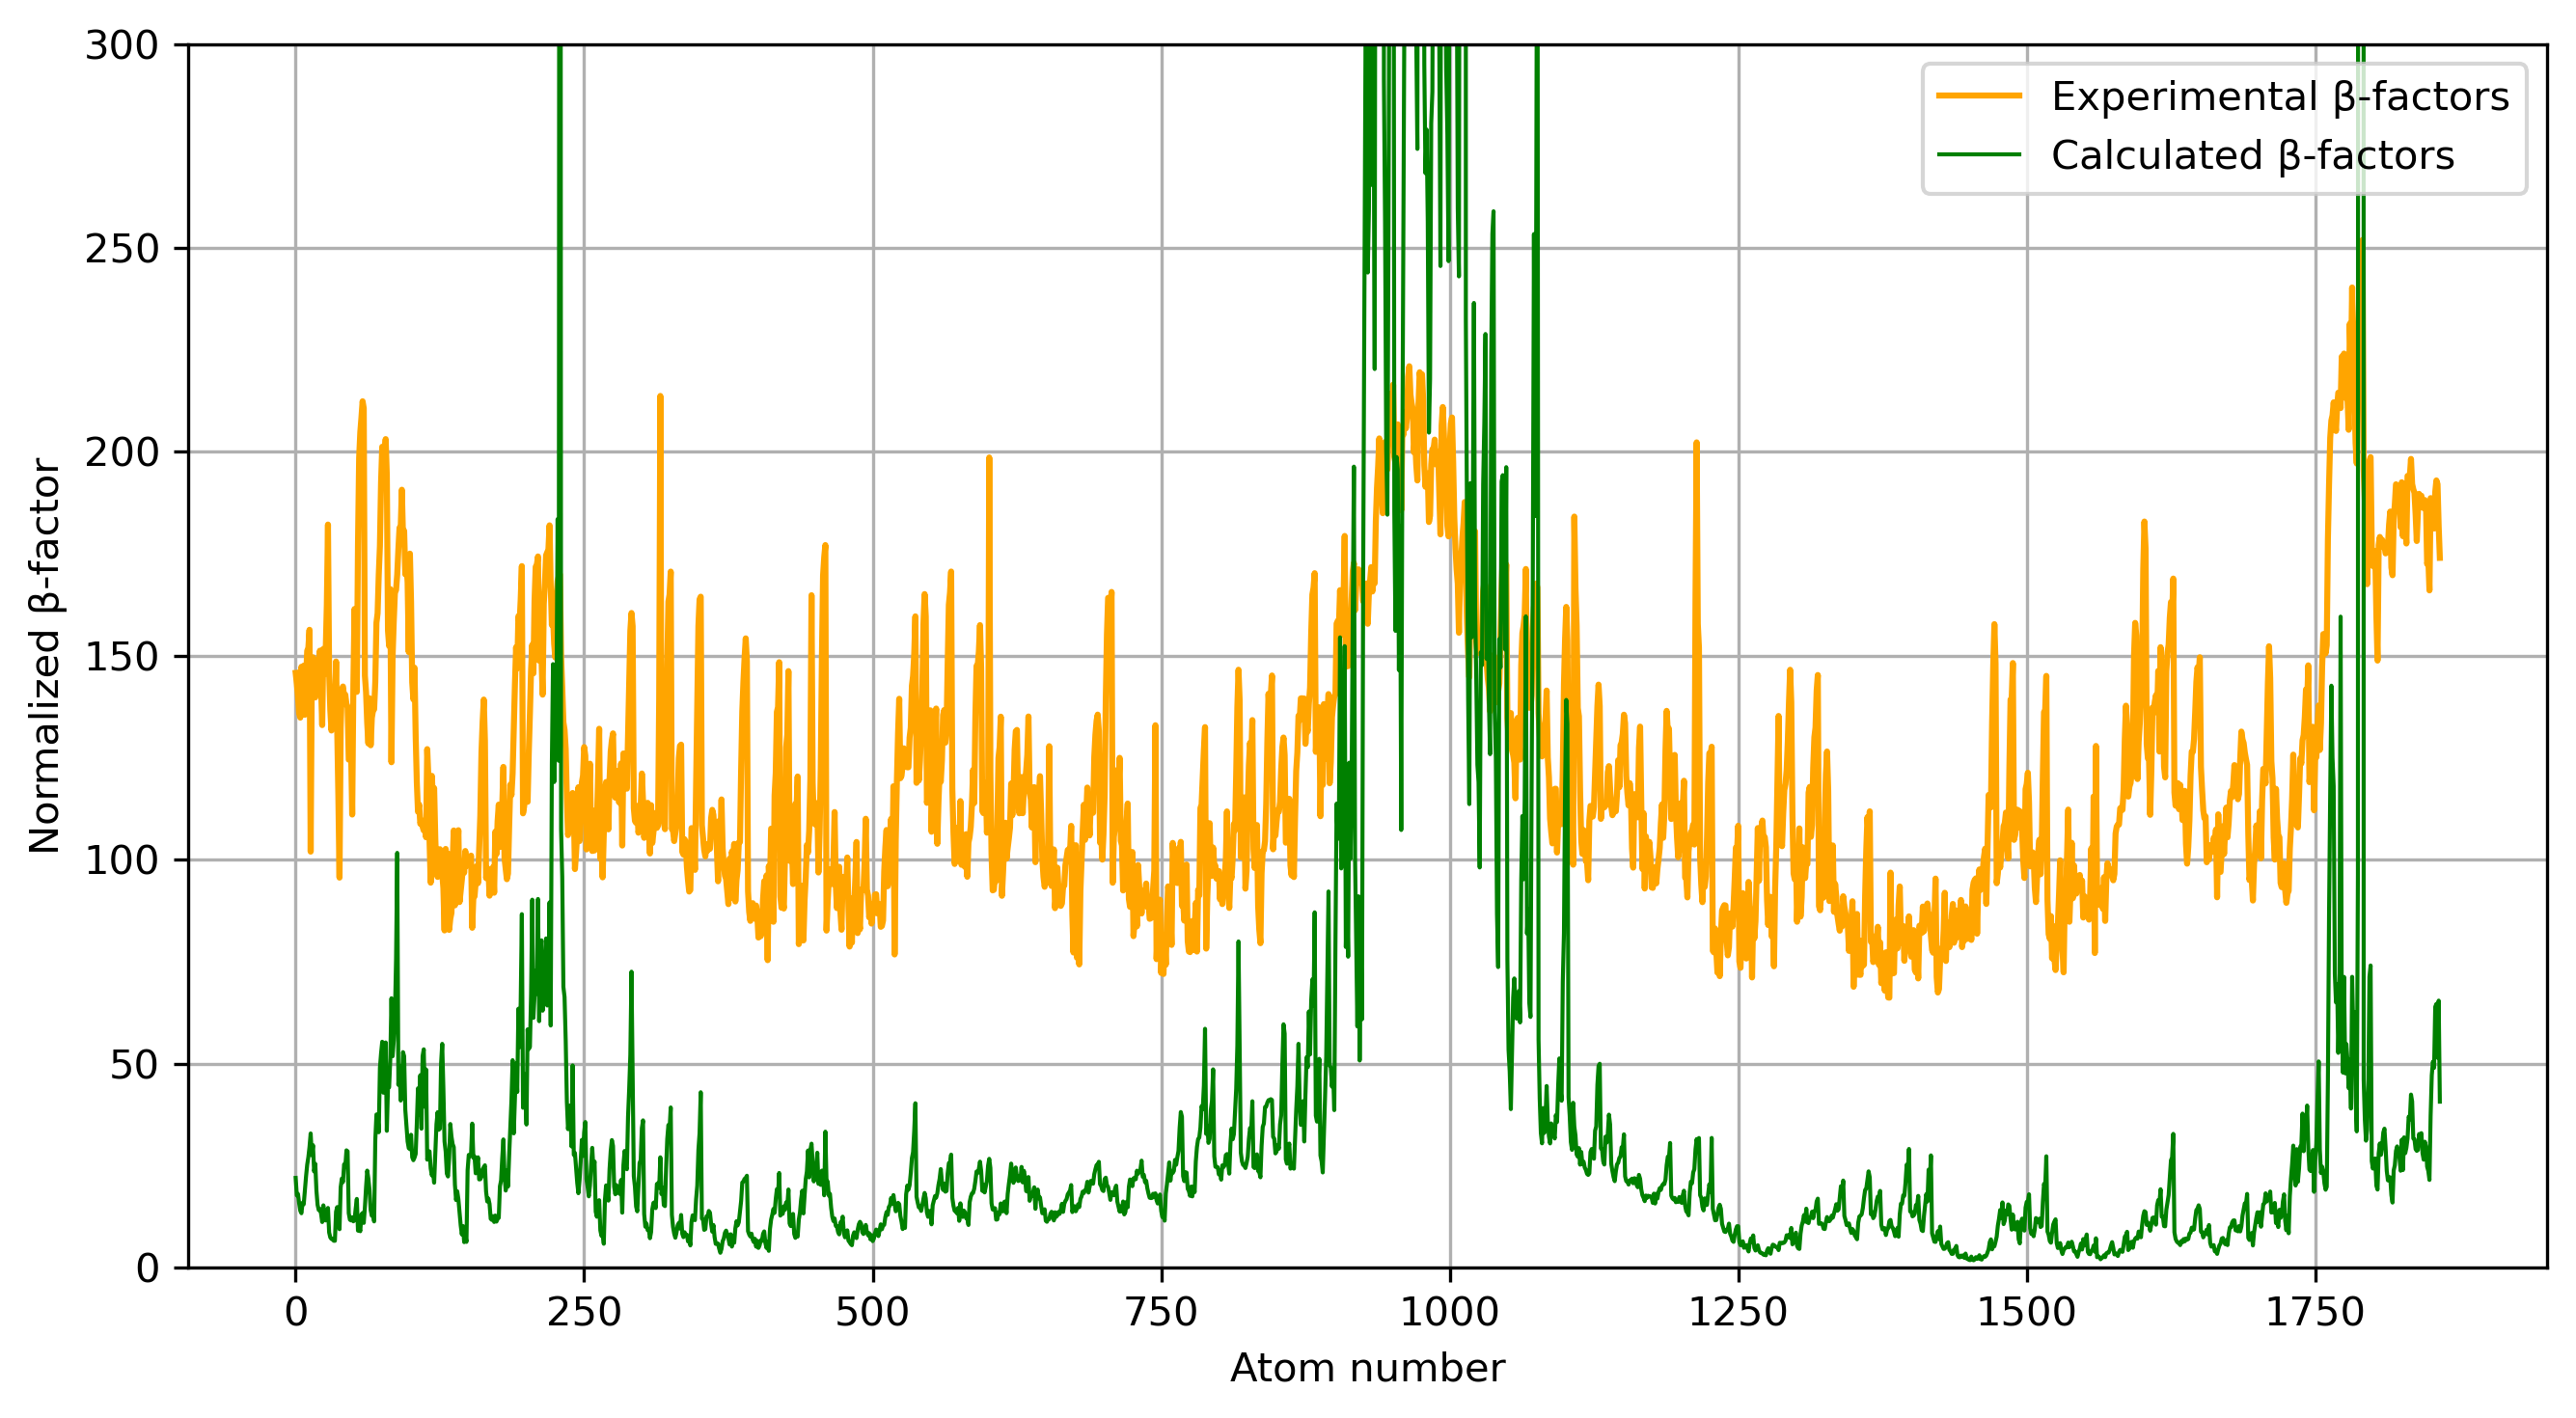

In [28]:
figure(figsize=(9, 5), dpi=300)
plot(bfactors, 'orange', label='Experimental β-factors')
plot(msfs*0.5, 'g', lw=1., label='Calculated β-factors')
#xlim(32655,34513)
ylim(0,300)
xlabel("Atom number")
ylabel("Normalized β-factor")
grid()
legend()
tight_layout();

In [6]:
print(corrcoef(calphas.getBetas(), calcSqFlucts(gnm))[0, 1].round(3))
rescaling_prefactor = (bfactors.mean() / calcSqFlucts(gnm).mean())
rescaling_prefactor.round(5)
gamma = 8 * pi**2 / rescaling_prefactor
gamma.round(5)

0.073


0.00058

In [53]:
import pandas as pd

l = calcHinges(gnm)
dn = pd.DataFrame()
dn["hinges"] = l
dn.to_csv("hinges_4j.csv")

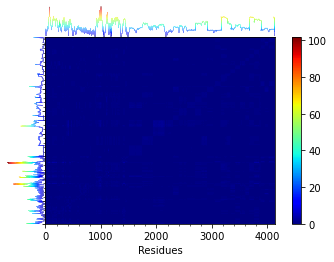

In [54]:
prs_mat, eff, sens = calcPerturbResponse(gnm)
showPerturbResponse(gnm)

df_response = pd.DataFrame()
df_response["eff"] = eff
df_response["sens"] = sens
df_response.to_csv('df_response_5l.csv')

In [45]:
list_ing = []
df_hinges = pd.DataFrame(columns=['atm','atm_num','atm_type','res','resnum'])
df_pdb = pd.read_csv('atom_ji1.csv',header=None,names = ['atm','atm_num','atm_type','res','resnum'],sep=',')
for i in range (0,len(df_pdb['atm'])):
    for j in range(0,len(dn["hinges"])):
        if df_pdb['atm'][i] == dn["hinges"][j]:
            #df_hinges.loc[j] = df_pdb.loc[i]
            #print(df_pdb['atm'][i])
            #df_hinges.append([df_pdb.index[i]] = df_pdb.iloc[i])
            print("**************",df_pdb.iloc[i])
            list_ing.append(df_pdb.iloc[i])
            
            

************** atm           4
atm_num     C4'
atm_type      U
res           A
resnum        5
Name: ATOM, dtype: object
************** atm           6
atm_num     C3'
atm_type      U
res           A
resnum        5
Name: ATOM, dtype: object
************** atm           7
atm_num     O3'
atm_type      U
res           A
resnum        5
Name: ATOM, dtype: object
************** atm           8
atm_num     C2'
atm_type      U
res           A
resnum        5
Name: ATOM, dtype: object
************** atm           9
atm_num     O2'
atm_type      U
res           A
resnum        5
Name: ATOM, dtype: object
************** atm          10
atm_num     C1'
atm_type      U
res           A
resnum        5
Name: ATOM, dtype: object
************** atm         12
atm_num     C2
atm_type     U
res          A
resnum       5
Name: ATOM, dtype: object
************** atm         13
atm_num     O2
atm_type     U
res          A
resnum       5
Name: ATOM, dtype: object
************** atm         14
atm_num     

************** atm         117
atm_num     C3'
atm_type      A
res           A
resnum       10
Name: ATOM, dtype: object
************** atm         118
atm_num     O3'
atm_type      A
res           A
resnum       10
Name: ATOM, dtype: object
************** atm         119
atm_num     C2'
atm_type      A
res           A
resnum       10
Name: ATOM, dtype: object
************** atm         120
atm_num     O2'
atm_type      A
res           A
resnum       10
Name: ATOM, dtype: object
************** atm         121
atm_num     C1'
atm_type      A
res           A
resnum       10
Name: ATOM, dtype: object
************** atm         122
atm_num      N1
atm_type      A
res           A
resnum       10
Name: ATOM, dtype: object
************** atm         123
atm_num      C2
atm_type      A
res           A
resnum       10
Name: ATOM, dtype: object
************** atm         124
atm_num      N3
atm_type      A
res           A
resnum       10
Name: ATOM, dtype: object
************** atm         125
a

************** atm         263
atm_num     C5'
atm_type      U
res           A
resnum       17
Name: ATOM, dtype: object
************** atm         264
atm_num     O5'
atm_type      U
res           A
resnum       17
Name: ATOM, dtype: object
************** atm         269
atm_num     C2'
atm_type      U
res           A
resnum       17
Name: ATOM, dtype: object
************** atm         270
atm_num     O2'
atm_type      U
res           A
resnum       17
Name: ATOM, dtype: object
************** atm         271
atm_num     C1'
atm_type      U
res           A
resnum       17
Name: ATOM, dtype: object
************** atm         272
atm_num      N1
atm_type      U
res           A
resnum       17
Name: ATOM, dtype: object
************** atm         274
atm_num      O2
atm_type      U
res           A
resnum       17
Name: ATOM, dtype: object
************** atm         275
atm_num      N3
atm_type      U
res           A
resnum       17
Name: ATOM, dtype: object
************** atm         276
a

************** atm         375
atm_num      N1
atm_type      G
res           A
resnum       22
Name: ATOM, dtype: object
************** atm         377
atm_num      N2
atm_type      G
res           A
resnum       22
Name: ATOM, dtype: object
************** atm         378
atm_num      N3
atm_type      G
res           A
resnum       22
Name: ATOM, dtype: object
************** atm         379
atm_num      C4
atm_type      G
res           A
resnum       22
Name: ATOM, dtype: object
************** atm         380
atm_num      C5
atm_type      G
res           A
resnum       22
Name: ATOM, dtype: object
************** atm         381
atm_num      C6
atm_type      G
res           A
resnum       22
Name: ATOM, dtype: object
************** atm         383
atm_num      N7
atm_type      G
res           A
resnum       22
Name: ATOM, dtype: object
************** atm         385
atm_num      N9
atm_type      G
res           A
resnum       22
Name: ATOM, dtype: object
************** atm         386
a

************** atm         536
atm_num      N9
atm_type      G
res           A
resnum       29
Name: ATOM, dtype: object
************** atm         537
atm_num     OP1
atm_type      G
res           A
resnum       29
Name: ATOM, dtype: object
************** atm         538
atm_num     OP2
atm_type      G
res           A
resnum       29
Name: ATOM, dtype: object
************** atm         539
atm_num       P
atm_type      U
res           A
resnum       30
Name: ATOM, dtype: object
************** atm         541
atm_num     O5'
atm_type      U
res           A
resnum       30
Name: ATOM, dtype: object
************** atm         543
atm_num     O4'
atm_type      U
res           A
resnum       30
Name: ATOM, dtype: object
************** atm         544
atm_num     C3'
atm_type      U
res           A
resnum       30
Name: ATOM, dtype: object
************** atm         545
atm_num     O3'
atm_type      U
res           A
resnum       30
Name: ATOM, dtype: object
************** atm         546
a

************** atm         652
atm_num     O3'
atm_type      G
res           A
resnum       35
Name: ATOM, dtype: object
************** atm         653
atm_num     C2'
atm_type      G
res           A
resnum       35
Name: ATOM, dtype: object
************** atm         658
atm_num      N2
atm_type      G
res           A
resnum       35
Name: ATOM, dtype: object
************** atm         660
atm_num      C4
atm_type      G
res           A
resnum       35
Name: ATOM, dtype: object
************** atm         664
atm_num      N7
atm_type      G
res           A
resnum       35
Name: ATOM, dtype: object
************** atm         665
atm_num      C8
atm_type      G
res           A
resnum       35
Name: ATOM, dtype: object
************** atm         666
atm_num      N9
atm_type      G
res           A
resnum       35
Name: ATOM, dtype: object
************** atm         671
atm_num     O5'
atm_type      C
res           A
resnum       36
Name: ATOM, dtype: object
************** atm         673
a

************** atm         812
atm_num      C4
atm_type      G
res           A
resnum       42
Name: ATOM, dtype: object
************** atm         813
atm_num      C5
atm_type      G
res           A
resnum       42
Name: ATOM, dtype: object
************** atm         814
atm_num      C6
atm_type      G
res           A
resnum       42
Name: ATOM, dtype: object
************** atm         815
atm_num      O6
atm_type      G
res           A
resnum       42
Name: ATOM, dtype: object
************** atm         816
atm_num      N7
atm_type      G
res           A
resnum       42
Name: ATOM, dtype: object
************** atm         818
atm_num      N9
atm_type      G
res           A
resnum       42
Name: ATOM, dtype: object
************** atm         819
atm_num     OP1
atm_type      G
res           A
resnum       42
Name: ATOM, dtype: object
************** atm         820
atm_num     OP2
atm_type      G
res           A
resnum       42
Name: ATOM, dtype: object
************** atm         821
a

************** atm         922
atm_num      N4
atm_type      C
res           A
resnum       47
Name: ATOM, dtype: object
************** atm         923
atm_num      C5
atm_type      C
res           A
resnum       47
Name: ATOM, dtype: object
************** atm         924
atm_num      C6
atm_type      C
res           A
resnum       47
Name: ATOM, dtype: object
************** atm         932
atm_num     C3'
atm_type      C
res           A
resnum       48
Name: ATOM, dtype: object
************** atm         933
atm_num     O3'
atm_type      C
res           A
resnum       48
Name: ATOM, dtype: object
************** atm         934
atm_num     C2'
atm_type      C
res           A
resnum       48
Name: ATOM, dtype: object
************** atm         935
atm_num     O2'
atm_type      C
res           A
resnum       48
Name: ATOM, dtype: object
************** atm         936
atm_num     C1'
atm_type      C
res           A
resnum       48
Name: ATOM, dtype: object
************** atm         939
a

************** atm         1043
atm_num      C1'
atm_type       A
res            A
resnum        53
Name: ATOM, dtype: object
************** atm         1044
atm_num       N1
atm_type       A
res            A
resnum        53
Name: ATOM, dtype: object
************** atm         1045
atm_num       C2
atm_type       A
res            A
resnum        53
Name: ATOM, dtype: object
************** atm         1046
atm_num       N3
atm_type       A
res            A
resnum        53
Name: ATOM, dtype: object
************** atm         1047
atm_num       C4
atm_type       A
res            A
resnum        53
Name: ATOM, dtype: object
************** atm         1049
atm_num       C6
atm_type       A
res            A
resnum        53
Name: ATOM, dtype: object
************** atm         1050
atm_num       N6
atm_type       A
res            A
resnum        53
Name: ATOM, dtype: object
************** atm         1051
atm_num       N7
atm_type       A
res            A
resnum        53
Name: ATOM, dtype:

************** atm         1154
atm_num       N3
atm_type       C
res            A
resnum        58
Name: ATOM, dtype: object
************** atm         1156
atm_num       N4
atm_type       C
res            A
resnum        58
Name: ATOM, dtype: object
************** atm         1157
atm_num       C5
atm_type       C
res            A
resnum        58
Name: ATOM, dtype: object
************** atm         1158
atm_num       C6
atm_type       C
res            A
resnum        58
Name: ATOM, dtype: object
************** atm         1159
atm_num      OP1
atm_type       C
res            A
resnum        58
Name: ATOM, dtype: object
************** atm         1160
atm_num      OP2
atm_type       C
res            A
resnum        58
Name: ATOM, dtype: object
************** atm         1161
atm_num        P
atm_type       A
res            A
resnum        59
Name: ATOM, dtype: object
************** atm         1165
atm_num      O4'
atm_type       A
res            A
resnum        59
Name: ATOM, dtype:

************** atm         1272
atm_num      O4'
atm_type       G
res            A
resnum        64
Name: ATOM, dtype: object
************** atm         1273
atm_num      C3'
atm_type       G
res            A
resnum        64
Name: ATOM, dtype: object
************** atm         1274
atm_num      O3'
atm_type       G
res            A
resnum        64
Name: ATOM, dtype: object
************** atm         1276
atm_num      O2'
atm_type       G
res            A
resnum        64
Name: ATOM, dtype: object
************** atm         1277
atm_num      C1'
atm_type       G
res            A
resnum        64
Name: ATOM, dtype: object
************** atm         1278
atm_num       N1
atm_type       G
res            A
resnum        64
Name: ATOM, dtype: object
************** atm         1279
atm_num       C2
atm_type       G
res            A
resnum        64
Name: ATOM, dtype: object
************** atm         1280
atm_num       N2
atm_type       G
res            A
resnum        64
Name: ATOM, dtype:

************** atm         1390
atm_num       N3
atm_type       G
res            A
resnum        69
Name: ATOM, dtype: object
************** atm         1393
atm_num       C6
atm_type       G
res            A
resnum        69
Name: ATOM, dtype: object
************** atm         1394
atm_num       O6
atm_type       G
res            A
resnum        69
Name: ATOM, dtype: object
************** atm         1395
atm_num       N7
atm_type       G
res            A
resnum        69
Name: ATOM, dtype: object
************** atm         1397
atm_num       N9
atm_type       G
res            A
resnum        69
Name: ATOM, dtype: object
************** atm         1398
atm_num      OP1
atm_type       G
res            A
resnum        69
Name: ATOM, dtype: object
************** atm         1399
atm_num      OP2
atm_type       G
res            A
resnum        69
Name: ATOM, dtype: object
************** atm         1400
atm_num        P
atm_type       G
res            A
resnum        70
Name: ATOM, dtype:

************** atm         1557
atm_num      C3'
atm_type       G
res            A
resnum        79
Name: ATOM, dtype: object
************** atm         1564
atm_num       N2
atm_type       G
res            A
resnum        79
Name: ATOM, dtype: object
************** atm         1567
atm_num       C5
atm_type       G
res            A
resnum        79
Name: ATOM, dtype: object
************** atm         1569
atm_num       O6
atm_type       G
res            A
resnum        79
Name: ATOM, dtype: object
************** atm         1571
atm_num       C8
atm_type       G
res            A
resnum        79
Name: ATOM, dtype: object
************** atm         1572
atm_num       N9
atm_type       G
res            A
resnum        79
Name: ATOM, dtype: object
************** atm         1575
atm_num        P
atm_type       G
res            A
resnum        80
Name: ATOM, dtype: object
************** atm         1580
atm_num      C3'
atm_type       G
res            A
resnum        80
Name: ATOM, dtype:

************** atm         2148
atm_num       N9
atm_type       G
res            A
resnum       111
Name: ATOM, dtype: object
************** atm         2149
atm_num      OP1
atm_type       G
res            A
resnum       111
Name: ATOM, dtype: object
************** atm         2150
atm_num      OP2
atm_type       G
res            A
resnum       111
Name: ATOM, dtype: object
************** atm         2152
atm_num      C5'
atm_type       G
res            A
resnum       112
Name: ATOM, dtype: object
************** atm         2153
atm_num      O5'
atm_type       G
res            A
resnum       112
Name: ATOM, dtype: object
************** atm         2157
atm_num      O3'
atm_type       G
res            A
resnum       112
Name: ATOM, dtype: object
************** atm         2158
atm_num      C2'
atm_type       G
res            A
resnum       112
Name: ATOM, dtype: object
************** atm         2160
atm_num      C1'
atm_type       G
res            A
resnum       112
Name: ATOM, dtype:

************** atm         2502
atm_num      C5'
atm_type       G
res            A
resnum       128
Name: ATOM, dtype: object
************** atm         2507
atm_num      O3'
atm_type       G
res            A
resnum       128
Name: ATOM, dtype: object
************** atm         2531
atm_num      C2'
atm_type       U
res            A
resnum       129
Name: ATOM, dtype: object
************** atm         2532
atm_num      O2'
atm_type       U
res            A
resnum       129
Name: ATOM, dtype: object
************** atm         2533
atm_num      C1'
atm_type       U
res            A
resnum       129
Name: ATOM, dtype: object
************** atm         2545
atm_num      C5'
atm_type       G
res            A
resnum      129A
Name: ATOM, dtype: object
************** atm         2546
atm_num      O5'
atm_type       G
res            A
resnum      129A
Name: ATOM, dtype: object
************** atm         2547
atm_num      C4'
atm_type       G
res            A
resnum      129A
Name: ATOM, dtype:

************** atm         2891
atm_num      O5'
atm_type       G
res            A
resnum       145
Name: ATOM, dtype: object
************** atm         2895
atm_num      O3'
atm_type       G
res            A
resnum       145
Name: ATOM, dtype: object
************** atm         2899
atm_num       N1
atm_type       G
res            A
resnum       145
Name: ATOM, dtype: object
************** atm         2902
atm_num       N3
atm_type       G
res            A
resnum       145
Name: ATOM, dtype: object
************** atm         2904
atm_num       C5
atm_type       G
res            A
resnum       145
Name: ATOM, dtype: object
************** atm         2912
atm_num        P
atm_type       G
res            A
resnum       146
Name: ATOM, dtype: object
************** atm         2919
atm_num      C2'
atm_type       G
res            A
resnum       146
Name: ATOM, dtype: object
************** atm         2920
atm_num      O2'
atm_type       G
res            A
resnum       146
Name: ATOM, dtype:

************** atm         3283
atm_num      OP1
atm_type       A
res            A
resnum       162
Name: ATOM, dtype: object
************** atm         3287
atm_num      O5'
atm_type       C
res            A
resnum       163
Name: ATOM, dtype: object
************** atm         3288
atm_num      C4'
atm_type       C
res            A
resnum       163
Name: ATOM, dtype: object
************** atm         3291
atm_num      O3'
atm_type       C
res            A
resnum       163
Name: ATOM, dtype: object
************** atm         3292
atm_num      C2'
atm_type       C
res            A
resnum       163
Name: ATOM, dtype: object
************** atm         3295
atm_num       N1
atm_type       C
res            A
resnum       163
Name: ATOM, dtype: object
************** atm         3311
atm_num      O3'
atm_type       U
res            A
resnum       164
Name: ATOM, dtype: object
************** atm         3319
atm_num       C4
atm_type       U
res            A
resnum       164
Name: ATOM, dtype:

************** atm         3844
atm_num       N3
atm_type       G
res            A
resnum       189
Name: ATOM, dtype: object
************** atm         3845
atm_num       C4
atm_type       G
res            A
resnum       189
Name: ATOM, dtype: object
************** atm         3846
atm_num       C5
atm_type       G
res            A
resnum       189
Name: ATOM, dtype: object
************** atm         3849
atm_num       N7
atm_type       G
res            A
resnum       189
Name: ATOM, dtype: object
************** atm         3850
atm_num       C8
atm_type       G
res            A
resnum       189
Name: ATOM, dtype: object
************** atm         3858
atm_num      O4'
atm_type       C
res            A
resnum       190
Name: ATOM, dtype: object


In [39]:
list_ing

[atm           4
 atm_num     C4'
 atm_type      U
 res           A
 resnum        5
 Name: ATOM, dtype: object,
 atm           5
 atm_num     O4'
 atm_type      U
 res           A
 resnum        5
 Name: ATOM, dtype: object,
 atm           6
 atm_num     C3'
 atm_type      U
 res           A
 resnum        5
 Name: ATOM, dtype: object,
 atm           7
 atm_num     O3'
 atm_type      U
 res           A
 resnum        5
 Name: ATOM, dtype: object,
 atm           8
 atm_num     C2'
 atm_type      U
 res           A
 resnum        5
 Name: ATOM, dtype: object,
 atm           9
 atm_num     O2'
 atm_type      U
 res           A
 resnum        5
 Name: ATOM, dtype: object,
 atm         11
 atm_num     N1
 atm_type     U
 res          A
 resnum       5
 Name: ATOM, dtype: object,
 atm         12
 atm_num     C2
 atm_type     U
 res          A
 resnum       5
 Name: ATOM, dtype: object,
 atm         13
 atm_num     O2
 atm_type     U
 res          A
 resnum       5
 Name: ATOM, dtype: object

In [1]:
import pandas as p
data = p.read_csv('2vqe_f.txt', sep="\t", header=None)
data.columns = ["a", "b","c","d"]

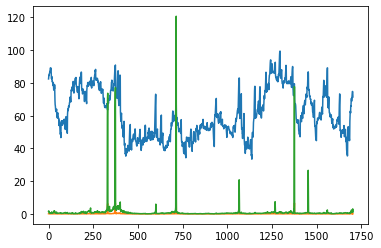

In [80]:
plt.plot(a)
plt.plot(d/600)
#plt.plot(data["a"]*400)
plt.plot(b*2000)
#plt.ylim(0,200)
#plt.xlim(1530,3800)

In [63]:
len(b)

2369

@> 51511 atoms and 1 coordinate set(s) were parsed in 0.28s.
@> Kirchhoff was built in 0.09s.
@> 20 modes were calculated in 4.40s.


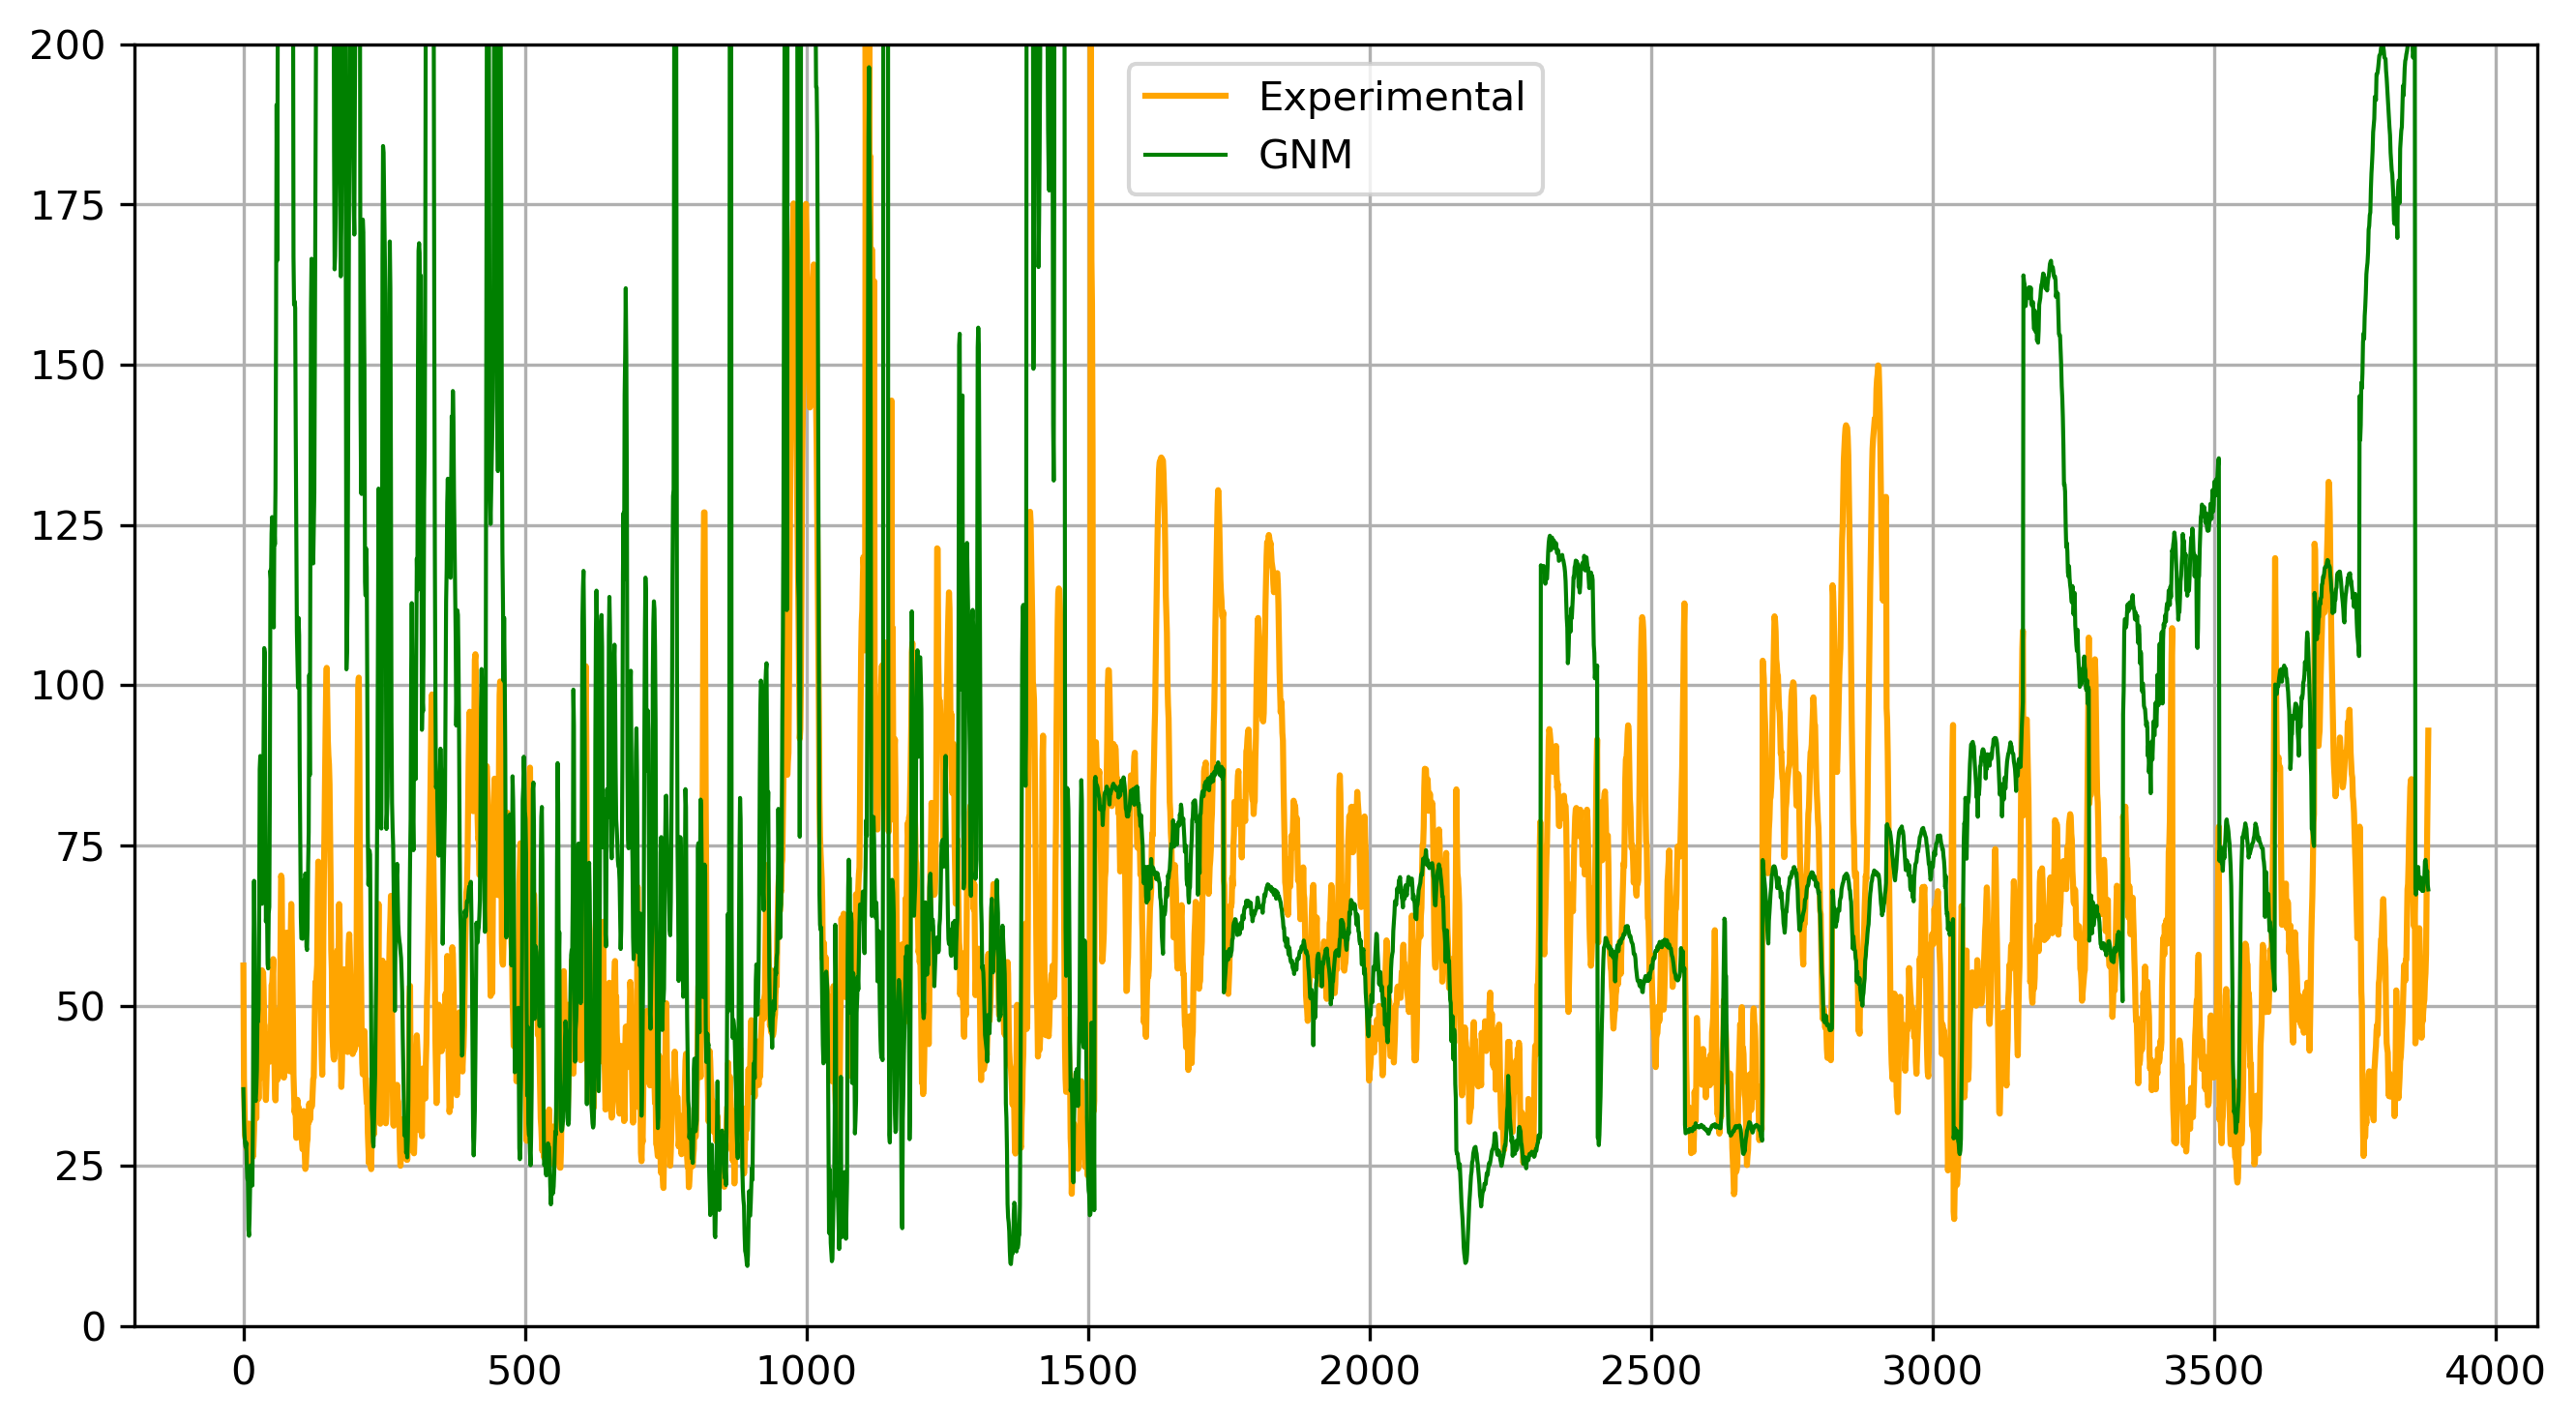

In [6]:
from numpy import *
from matplotlib.pyplot import *
pdb = parsePDB("2vqe_f.pdb")
calphas = pdb.select('name CA or name P')
gnm = GNM('AKE')
gnm.buildKirchhoff(calphas)
gnm.calcModes()
calcHinges(gnm[:2])

bfactors = calphas.getBetas()
msfs = calcSqFlucts(gnm)
msfs = msfs / mean(msfs) * mean(bfactors)

figure(figsize=(9, 5), dpi=300)
plot(bfactors, 'orange', label='Experimental')
plot(msfs*2, 'g', lw=1., label='GNM')
#xlim(1510,4000)
ylim(0,200)
grid()
legend()
tight_layout();

In [7]:
print(corrcoef(calphas.getBetas(), calcSqFlucts(gnm))[0, 1].round(3))
rescaling_prefactor = (bfactors.mean() / calcSqFlucts(gnm).mean())
rescaling_prefactor.round(5)
gamma = 8 * pi**2 / rescaling_prefactor
gamma.round(5)

0.243


0.14409